In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns



In [2]:
def plot_3d(x,y,z,age):
    # Create the 3D scatter plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Normalize the z_data to range [0, 1]
    scaler = MinMaxScaler(feature_range=(0, 1))
    z_data_normalized = scaler.fit_transform(age.values.reshape(-1, 1))

    # Set the colormap for coloring (using 'viridis' colormap)
    # cmap = plt.cm.gray # for white to dark
    cmap = plt.cm.viridis #for blue to yellow

    # Plot the data points in the 3D space with color based on z_data values
    sc = ax.scatter(x,y,z, c=age, cmap=cmap, marker='o')

    # Set axis labels
    ax.set_xlabel('young_score')
    ax.set_ylabel('middle_score')
    ax.set_zlabel('old_score')

    

    # Add colorbar to the plot
    cbar = plt.colorbar(sc, ax=ax, label='Age')
    # ax.view_init(elev=20, azim=10) #to get different views
    # Show the plot
    plt.show()


In [3]:
df = pd.read_csv("age3D.csv")

In [4]:
df.columns

Index(['young_score', 'middle_score', 'old_score', 'age'], dtype='object')

In [5]:
df.head()

,young_score,middle_score,old_score,age
0,0.238636,0.225028,0.213086,20
1,0.232075,0.209088,0.205657,20
2,0.217873,0.197214,0.196023,20
3,0.226708,0.209935,0.217214,20
4,0.245715,0.212973,0.210779,20


In [6]:
df["young-middle"] =     df['young_score']  -     df['middle_score']
df["young-old"]    =     df['young_score']  -     df['old_score']
df["middle-old"]   =     df['middle_score'] -     df['old_score']

In [7]:
df['mean']         =     df[['young_score','middle_score','old_score']].values.mean(axis=1)

In [8]:
df["mean-young"]   =     df['mean']         -     df['young_score']
df["mean-middle"]  =     df['mean']         -     df['middle_score']
df["mean-old"]     =     df['mean']         -     df['old_score']

In [9]:
df

,young_score,middle_score,old_score,age,young-middle,young-old,middle-old,mean,mean-young,mean-middle,mean-old
0,0.238636,0.225028,0.213086,20,0.013608,0.025550,0.011942,0.225583,-0.013053,0.000555,0.012497
1,0.232075,0.209088,0.205657,20,0.022987,0.026418,0.003431,0.215607,-0.016468,0.006519,0.009950
2,0.217873,0.197214,0.196023,20,0.020659,0.021850,0.001191,0.203703,-0.014170,0.006489,0.007680
3,0.226708,0.209935,0.217214,20,0.016773,0.009494,-0.007279,0.217953,-0.008756,0.008018,0.000738
4,0.245715,0.212973,0.210779,20,0.032742,0.034936,0.002194,0.223155,-0.022559,0.010183,0.012377
...,...,...,...,...,...,...,...,...,...,...,...
18259,0.226128,0.236652,0.237462,75,-0.010524,-0.011335,-0.000811,0.233414,0.007286,-0.003238,-0.004048
18260,0.202673,0.220248,0.226233,75,-0.017575,-0.023560,-0.005985,0.216385,0.013712,-0.003863,-0.009848
18261,0.203822,0.240130,0.243964,75,-0.036308,-0.040142,-0.003834,0.229306,0.025484,-0.010825,-0.014659
18262,0.200714,0.231017,0.262516,75,-0.030303,-0.061802,-0.031499,0.231416,0.030702,0.000399,-0.031100


# Normal Visualization

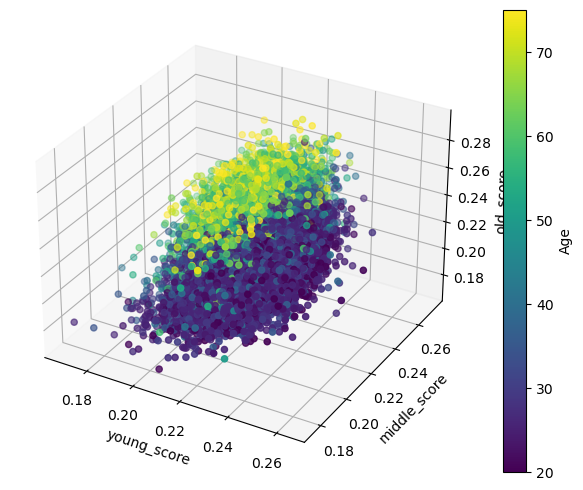

In [10]:
plot_3d(df['young_score'],df['middle_score'],df['old_score'],df['age'])

# Age Visualization based on their age group difference

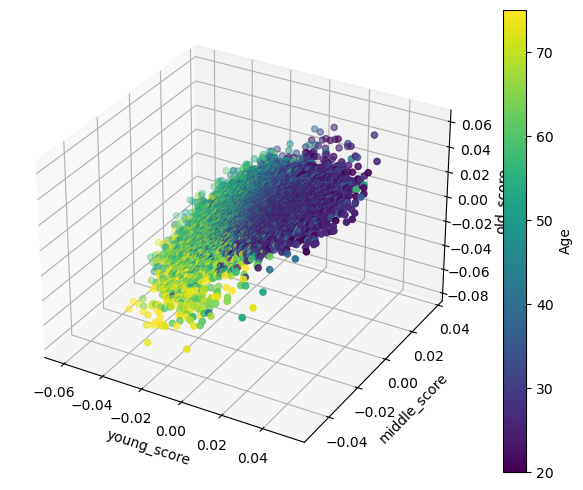

In [11]:
plot_3d(df['young-middle'], df['middle-old'] , df['young-old'], df['age'])

# Age Visualization based the difference From Mean

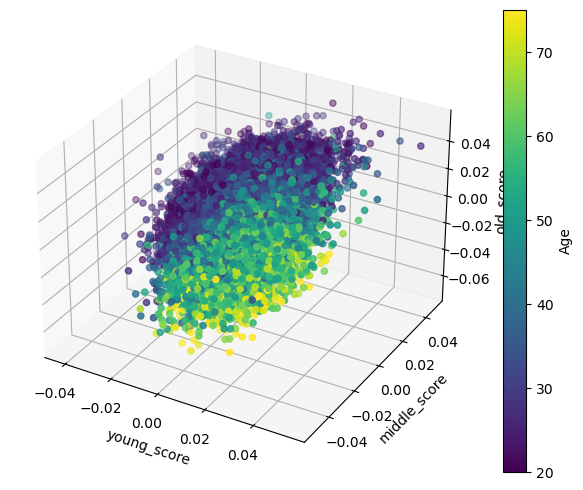

In [12]:
plot_3d(df['mean-young'],df['mean-middle'],df['mean-old'],df['age'])

In [13]:
df1 = df[['young_score','middle_score','old_score','age']]

In [14]:
df1

,young_score,middle_score,old_score,age
0,0.238636,0.225028,0.213086,20
1,0.232075,0.209088,0.205657,20
2,0.217873,0.197214,0.196023,20
3,0.226708,0.209935,0.217214,20
4,0.245715,0.212973,0.210779,20
...,...,...,...,...
18259,0.226128,0.236652,0.237462,75
18260,0.202673,0.220248,0.226233,75
18261,0.203822,0.240130,0.243964,75
18262,0.200714,0.231017,0.262516,75


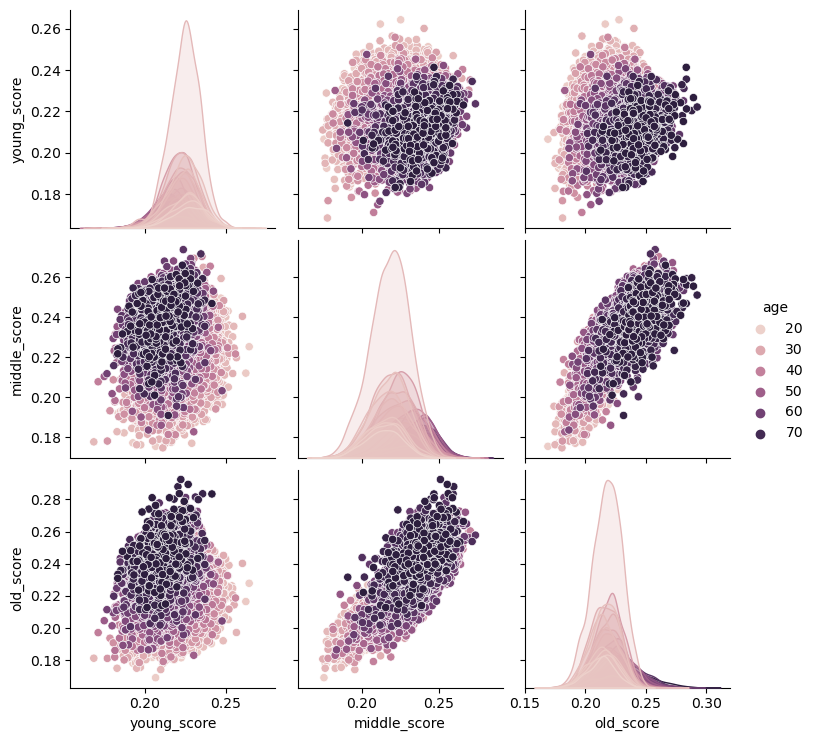

In [15]:
sns.pairplot(df1,hue='age')

In [16]:
df

,young_score,middle_score,old_score,age,young-middle,young-old,middle-old,mean,mean-young,mean-middle,mean-old
0,0.238636,0.225028,0.213086,20,0.013608,0.025550,0.011942,0.222232,-0.016404,-0.002796,0.009146
1,0.232075,0.209088,0.205657,20,0.022987,0.026418,0.003431,0.222232,-0.009842,0.013144,0.016576
2,0.217873,0.197214,0.196023,20,0.020659,0.021850,0.001191,0.222232,0.004359,0.025018,0.026209
3,0.226708,0.209935,0.217214,20,0.016773,0.009494,-0.007279,0.222232,-0.004476,0.012297,0.005018
4,0.245715,0.212973,0.210779,20,0.032742,0.034936,0.002194,0.222232,-0.023482,0.009260,0.011454
...,...,...,...,...,...,...,...,...,...,...,...
18259,0.226128,0.236652,0.237462,75,-0.010524,-0.011335,-0.000811,0.222232,-0.003895,-0.014419,-0.015230
18260,0.202673,0.220248,0.226233,75,-0.017575,-0.023560,-0.005985,0.222232,0.019559,0.001984,-0.004001
18261,0.203822,0.240130,0.243964,75,-0.036308,-0.040142,-0.003834,0.222232,0.018410,-0.017898,-0.021732
18262,0.200714,0.231017,0.262516,75,-0.030303,-0.061802,-0.031499,0.222232,0.021518,-0.008785,-0.040284


In [17]:
def heatmap(df):
    
    correlation_matrix_age = df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix_age, annot=True, cmap='cool', fmt='.1f', cbar_kws={'label': ' Age'})
    plt.title('Correlation Heatmap based on Age')
    plt.show()


In [18]:
first = df[['young_score','middle_score','old_score','age']]
first

,young_score,middle_score,old_score,age
0,0.238636,0.225028,0.213086,20
1,0.232075,0.209088,0.205657,20
2,0.217873,0.197214,0.196023,20
3,0.226708,0.209935,0.217214,20
4,0.245715,0.212973,0.210779,20
...,...,...,...,...
18259,0.226128,0.236652,0.237462,75
18260,0.202673,0.220248,0.226233,75
18261,0.203822,0.240130,0.243964,75
18262,0.200714,0.231017,0.262516,75


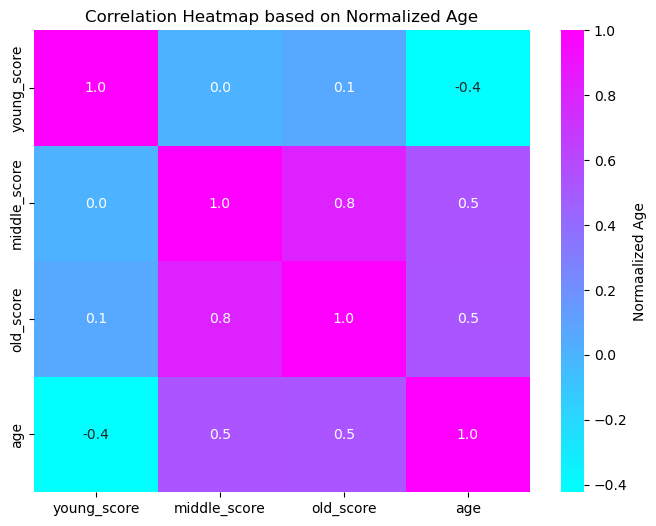

In [19]:
heatmap(first)

In [20]:
second = df[['young-middle','young-old','middle-old','age']]
second

,young-middle,young-old,middle-old,age
0,0.013608,0.025550,0.011942,20
1,0.022987,0.026418,0.003431,20
2,0.020659,0.021850,0.001191,20
3,0.016773,0.009494,-0.007279,20
4,0.032742,0.034936,0.002194,20
...,...,...,...,...
18259,-0.010524,-0.011335,-0.000811,75
18260,-0.017575,-0.023560,-0.005985,75
18261,-0.036308,-0.040142,-0.003834,75
18262,-0.030303,-0.061802,-0.031499,75


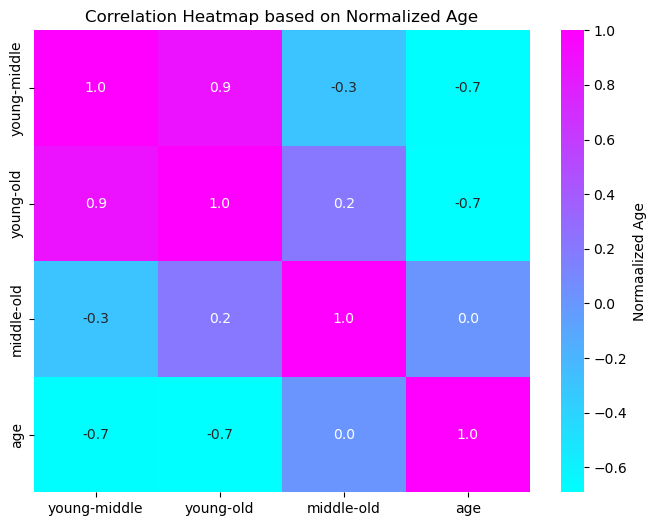

In [21]:
heatmap(second)

In [22]:
third = df[['mean-young','mean-middle','mean-old','age']]
third

C:\Users\nauman.tasawar\AppData\Local\Temp\ipykernel_15184\437330803.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  third['age_normalized'] = scaler.fit_transform(third['age'].values.reshape(-1, 1))


,mean-young,mean-middle,mean-old,age_normalized
0,-0.016404,-0.002796,0.009146,0.0
1,-0.009842,0.013144,0.016576,0.0
2,0.004359,0.025018,0.026209,0.0
3,-0.004476,0.012297,0.005018,0.0
4,-0.023482,0.009260,0.011454,0.0
...,...,...,...,...
18259,-0.003895,-0.014419,-0.015230,1.0
18260,0.019559,0.001984,-0.004001,1.0
18261,0.018410,-0.017898,-0.021732,1.0
18262,0.021518,-0.008785,-0.040284,1.0


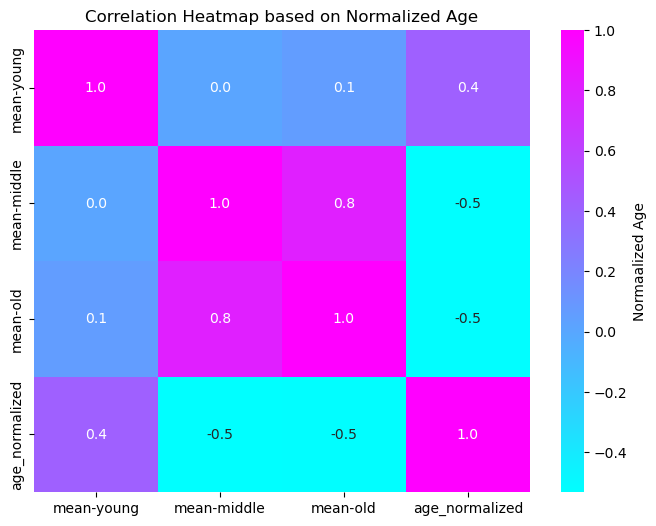

In [23]:
heatmap(third)